In [1]:
%pip install pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
sub_df=pd.read_csv("sample_submission.csv")

In [4]:
train_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [5]:
train_df['stroke'].unique()


array([0, 1])

*supervised and binary classification


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.00,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [8]:
train_df.duplicated().sum()

np.int64(0)

In [9]:
#data cleaning

train_df['age'].unique().tolist()

[28.0,
 33.0,
 42.0,
 56.0,
 24.0,
 34.0,
 53.0,
 78.0,
 45.0,
 62.0,
 51.0,
 4.0,
 23.0,
 36.0,
 59.0,
 40.0,
 47.0,
 31.0,
 1.72,
 71.0,
 50.0,
 55.0,
 38.0,
 57.0,
 12.0,
 61.0,
 48.0,
 17.0,
 58.0,
 26.0,
 8.0,
 2.0,
 39.0,
 52.0,
 19.0,
 54.0,
 72.0,
 15.0,
 11.0,
 76.0,
 82.0,
 18.0,
 74.0,
 43.0,
 21.0,
 65.0,
 9.0,
 80.0,
 68.0,
 44.0,
 32.0,
 7.0,
 25.0,
 79.0,
 63.0,
 5.0,
 81.0,
 10.0,
 3.0,
 60.0,
 49.0,
 0.32,
 6.0,
 70.0,
 73.0,
 20.0,
 46.0,
 37.0,
 67.0,
 29.0,
 69.0,
 1.32,
 30.0,
 14.0,
 75.0,
 22.0,
 27.0,
 77.0,
 35.0,
 66.0,
 1.8,
 1.88,
 0.88,
 13.0,
 1.48,
 41.0,
 64.0,
 1.3,
 0.16,
 0.8,
 16.0,
 1.64,
 1.4,
 0.64,
 0.4,
 1.24,
 1.08,
 0.72,
 0.56,
 1.0,
 1.56,
 1.16,
 0.48,
 0.08,
 0.68,
 0.24]

In [10]:
sorted(train_df['age'].unique().tolist())

[0.08,
 0.16,
 0.24,
 0.32,
 0.4,
 0.48,
 0.56,
 0.64,
 0.68,
 0.72,
 0.8,
 0.88,
 1.0,
 1.08,
 1.16,
 1.24,
 1.3,
 1.32,
 1.4,
 1.48,
 1.56,
 1.64,
 1.72,
 1.8,
 1.88,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0]

In [11]:
train_df['age']=np.ceil(train_df['age'])
test_df['age']=np.ceil(test_df['age'])

In [12]:
train_df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [13]:
train_df.drop(train_df[train_df['gender']=='Other'].index,inplace=True)
test_df.drop(test_df[test_df['gender']=='Other'].index,inplace=True)

In [14]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install set_matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement set_matplotlib (from versions: none)
ERROR: No matching distribution found for set_matplotlib


In [16]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [17]:
#exploratory data analysis(EDA)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style('darkgrid')

In [18]:
plot_color = ['red', 'black']
sns.set_palette(plot_color)

In [19]:
#filter data for stroke and non-stroke

no_stroke_data=train_df[train_df['stroke']==0]
stroke_data=train_df[train_df['stroke']==1]

In [20]:
#univarient analysis

stroke_count=train_df['stroke'].value_counts()

In [21]:
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

In [22]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [25]:
plotly_get_chrome

NameError: name 'plotly_get_chrome' is not defined

In [26]:
fig = px.pie(
    stroke_count,
    values=stroke_count.values,
    names=['No', 'Yes'],
    title='Proportion of Stroke Cases',
    color_discrete_sequence=plot_color
)

fig.update_layout(
    legend_title_text='Stroke Status',
    title_x=0.3,
    title_y=0.95
)

fig.show('svg')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = px.pie(
    values=stroke_count.values
)

fig.show('svg') 



ValueError: 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido


In [ ]:
#bivarient analysis

def custom_histogram(columns:str,titles:list)->go.Figure:
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['No Stroke','Yes Stroke'])
    histogram_no_stroke=px.histogram(no_stroke_data,x=columns,color_discrete_sequence=['#008080'])
    histogram_stroke=px.histogram(stroke_data,x=columns,color_discrete_sequence=['#008080'])
    fig.add_trace(histogram_no_stroke['data'][0],row=1,col=1)
    fig.add_trace(histogram_stroke['data'][0],row=1,col=2)
    fig.update_layout(title=titles[0],title_x=0.5)
    fig.update_xaxes(title_text=titles[1])
    fig.update_yaxes(title_text='Count')
    return fig

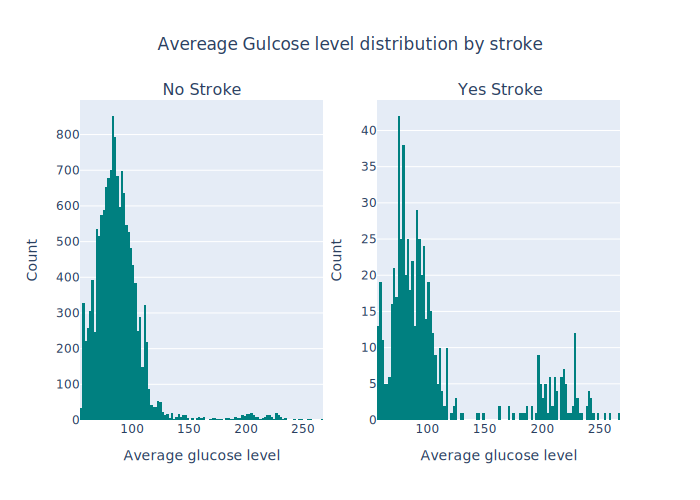

In [ ]:
fig=custom_histogram('avg_glucose_level',['Avereage Gulcose level distribution by stroke','Average glucose level'])
fig.show('svg')

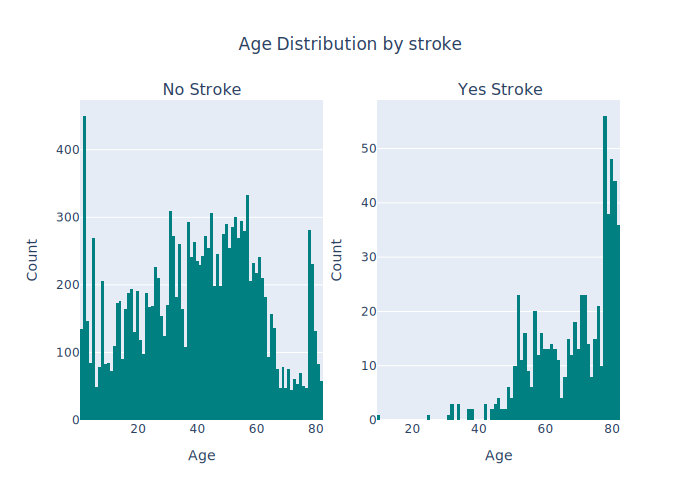

In [ ]:
fig = custom_histogram('age', ['Age Distribution by stroke', 'Age'])
fig.show('svg')

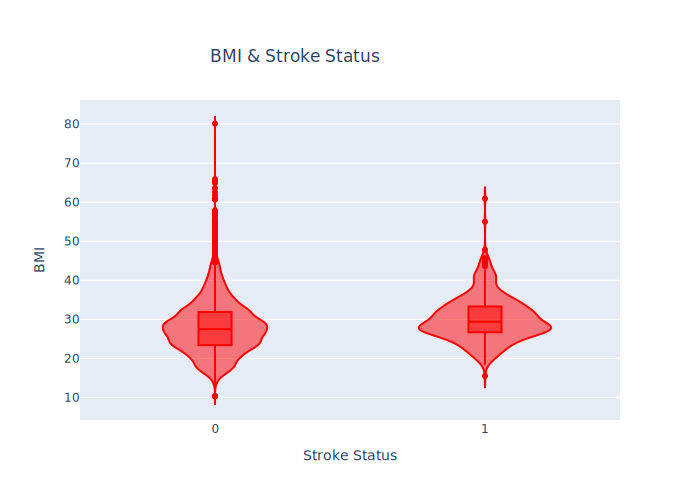

In [ ]:
fig = px.violin(train_df, y = 'bmi', x='stroke', box=True, width=700, height=500, color_discrete_sequence=plot_color, 
                   title='BMI & Stroke Status', 
               labels={'stroke': 'Stroke Status', 'bmi': 'BMI'})
fig.update_layout(title_x = 0.3, title_y = 0.9)
fig.show('svg')

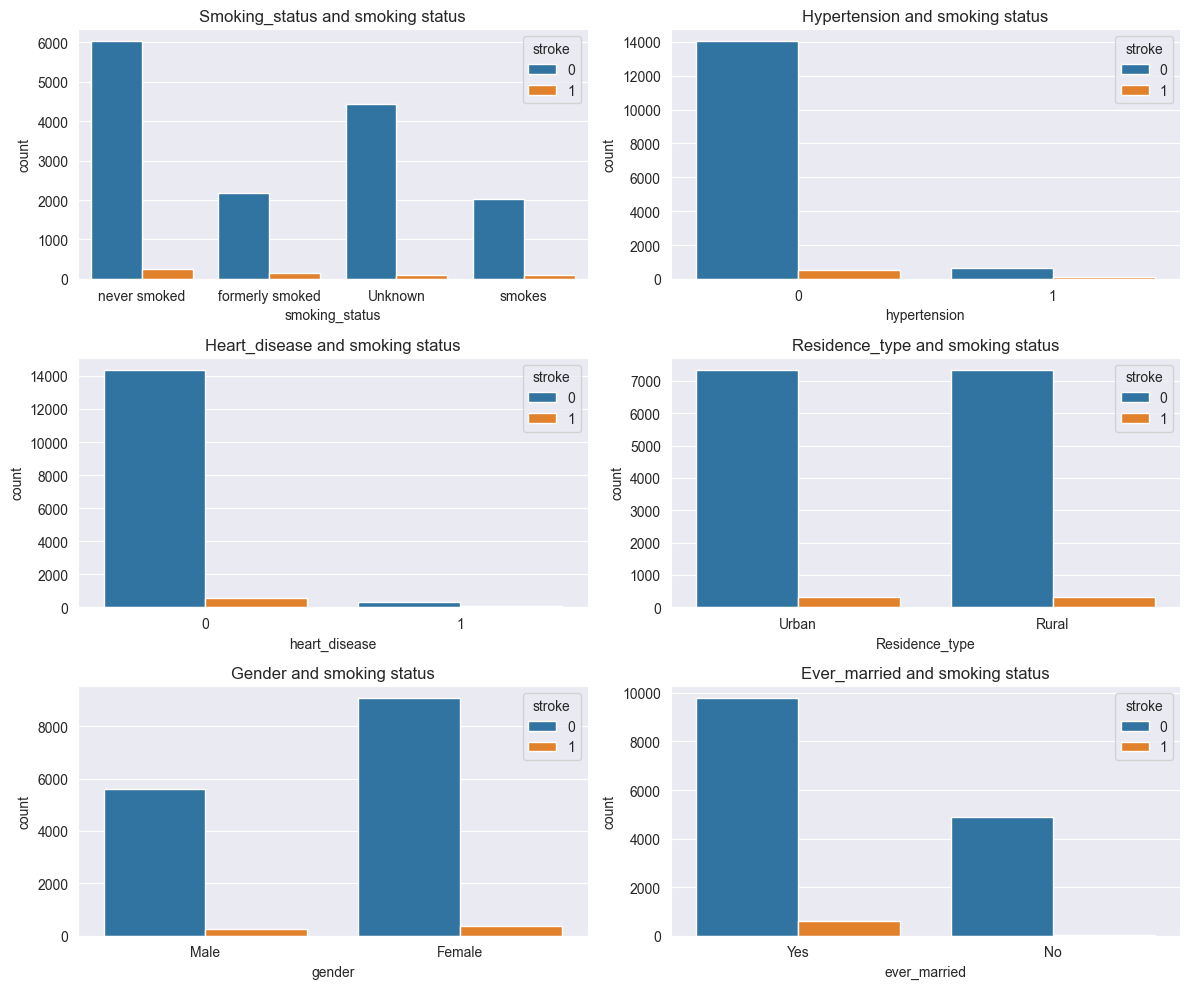

In [ ]:
x_values = ['smoking_status', 'hypertension', 'heart_disease','Residence_type','gender', 'ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data = train_df, x = x_value, hue='stroke',ax=ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display = 'diagram')

In [ ]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
input_cols = list(train_df.columns)[1:-1]

In [ ]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:
target_col = 'stroke'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()

In [ ]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()

In [ ]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [ ]:
categorical_cols = train_inputs.select_dtypes(include='object').columns.to_list()

In [ ]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
categorical_cols.remove('smoking_status')

In [ ]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [ ]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [ ]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc,['smoking_status']), 
    ('OneHot_Encode', onehot_enc,categorical_cols)
]
)

In [ ]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [ ]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [ ]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [ ]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [ ]:
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

X_test = test_inputs[numerical_cols + encoded_cols]

In [ ]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train.shape[1] == X_test.shape[1]

True

In [ ]:
# Split Dataset into training and validation set
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(12242, 17)

In [ ]:
# Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
models = [
    (LogisticRegression(), 'LogisticRegression'), 
    (RandomForestClassifier(), 'RandomForestClassifier'), 
    (XGBClassifier(), 'XGBClassifier'), 
    (LGBMClassifier(verbose = 1), 'LightGBM')
]

In [ ]:
def evalue_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [ ]:
confusion_mats = {}
def metric_df(model, model_name):
    confusion_mat, *df = evalue_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuarcy','Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

In [ ]:
predictions = []
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [ ]:
predictions

[                Model  Accuarcy  Precision    Recall        F1
 0  LogisticRegression  0.955243   0.333333  0.022388  0.041958,
                     Model  Accuarcy  Precision    Recall        F1
 0  RandomForestClassifier   0.95361        0.3  0.044776  0.077922,
            Model  Accuarcy  Precision    Recall        F1
 0  XGBClassifier  0.953283   0.363636  0.089552  0.143713,
       Model  Accuarcy  Precision    Recall        F1
 0  LightGBM   0.95459   0.380952  0.059701  0.103226]

In [ ]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [ ]:
X_train_ns.shape

(23488, 17)

In [ ]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)

In [ ]:
for model_name , confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()

Confusion Matrix for LogisticRegression
[[2921    6]
 [ 131    3]]

Confusion Matrix for RandomForestClassifier
[[2913   14]
 [ 128    6]]

Confusion Matrix for XGBClassifier
[[2906   21]
 [ 122   12]]

Confusion Matrix for LightGBM
[[2914   13]
 [ 126    8]]

Confusion Matrix for Logistic With SMOTE
[[2335  592]
 [  32  102]]



In [ ]:
# Voting Classifer . Hard and Soft
from sklearn.ensemble import VotingClassifier

In [ ]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression())), 
estimator.append(('RandomForestClassifier', RandomForestClassifier())), 
estimator.append(('XGBClassifier', XGBClassifier())), 
estimator.append(('LightGBM', LGBMClassifier(verbose = 1)))

In [ ]:
VC_hard = VotingClassifier(estimators=estimator, voting='hard')
VC_hard.fit(X_train, y_train)
VC_hard_mat = metric_df(VC_hard, 'VC_HARD')
predictions.append(VC_hard_mat)

[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [ ]:
VC_hard_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_HARD,0.956223,0.5,0.022388,0.042857


In [ ]:
VC_soft = VotingClassifier(estimators=estimator, voting='soft')
VC_soft.fit(X_train, y_train)
VC_soft_mat = metric_df(VC_soft, 'VC_soft')
predictions.append(VC_soft_mat)

[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [ ]:
VC_soft_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_soft,0.95557,0.416667,0.037313,0.068493


In [ ]:
prediction_base = pd.concat(predictions, ignore_index=True, sort =False)
prediction_base = prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis = 'index')

In [ ]:
prediction_base

Model,Accuarcy,Precision,Recall,F1
Logistic With SMOTE,0.796145,0.146974,0.761194,0.246377
XGBClassifier,0.953283,0.363636,0.089552,0.143713
LightGBM,0.954590,0.380952,0.059701,0.103226
RandomForestClassifier,0.953610,0.300000,0.044776,0.077922
VC_soft,0.955570,0.416667,0.037313,0.068493
LogisticRegression,0.955243,0.333333,0.022388,0.041958
VC_HARD,0.956223,0.500000,0.022388,0.042857


In [ ]:
models_to_plot = [
    'LogisticRegression', 
    'RandomForestClassifier', 
    'XGBClassifier', 
    'Logistic With SMOTE'
]

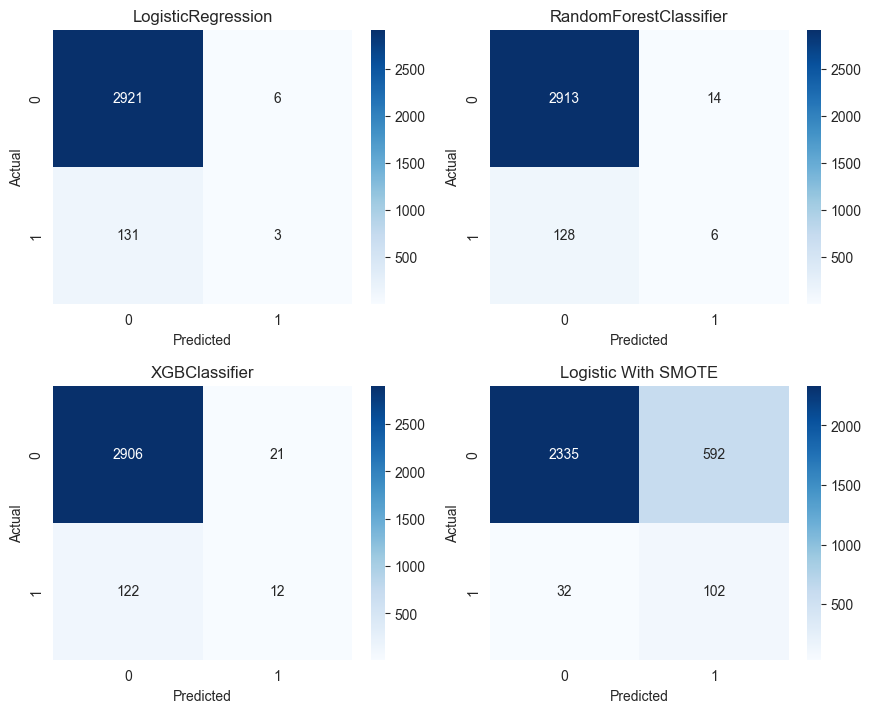

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (9, 7))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Blues', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
plt.show()

In [ ]:
# AUC - ROC Curve Homework ->
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Precision - recall curve
from sklearn.metrics import PredictionErrorDisplay

In [ ]:
# Retrain & Save Model
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

In [ ]:
preds = lr_with_smote.predict(X_test)

In [ ]:
preds

array([0, 0, 0, ..., 0, 0, 0], shape=(10203,))

In [ ]:
sub_df = preds


In [ ]:
pd.DataFrame(sub_df).to_csv("submission.csv", index=None)

In [ ]:
sub_df = pd.read_csv("submission.csv")

In [ ]:
sub_df.head()

,0
0,0
1,0
2,0
3,1
4,0


In [ ]:
# Make Prediction on a single input

sub_df['stroke'] = preds

In [ ]:
sub_df

,0,stroke
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
10198,0,0
10199,0,0
10200,0,0
10201,0,0


In [ ]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
single_input = {
    'gender': 'Male', 
    'age': 33, 
    'hypertension':0,
    'heart_disease': 0, 
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [ ]:
input_df = pd.DataFrame([single_input])

In [ ]:
input_df[encoded_cols] = preprocessor.transform(input_df)

In [ ]:
X = input_df[numerical_cols + encoded_cols]

In [ ]:
lr_with_smote.predict(X)

array([0])

In [ ]:
import joblib

In [ ]:
model = {
    'encoded_cols': encoded_cols, 
    'numeric_cols':numerical_cols, 
    'preprocessor': preprocessor, 
    'model': lr_with_smote
}

In [ ]:
joblib.dump(model, 'model.joblib')

['model.joblib']